In [2]:
# Optional - used to mount drive if using google colab;
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ANN
# Author: Robert Barbulescu

# importing necessary packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# used for better plots
plt.style.use('ggplot')

In [4]:
# The features existing on the dataset 
# The features names were obtained from: http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
features = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# Mounting and reaidng the csv file with the dataset
# Also available using sklearn packgae: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kddcup.data_10_percent_corrected', names = features, header=None)

# visulaize first 5 rows
dataset.head()

# The number of samples and dimensions
print('Data Points:',dataset.shape[0])
print('Features:',dataset.shape[1])
print("The initial dataset shape is:", dataset.shape)
print("=======================================================================")

Data Points: 494021
Features: 42
The initial dataset shape is: (494021, 42)


In [5]:
# Initial dataset values 
# Checking for the data type
print("The dataset contains the following:")
print("=======================================================================")
dataset.info()
print("=======================================================================")

The dataset contains the following:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised       

In [6]:
# remove any existing duplicates
dataset.drop_duplicates(subset=None, keep='first', inplace=True)
print("Duplicates succesfully dropped.")
print("Dataset shape is:", dataset.shape)

Duplicates succesfully dropped.
Dataset shape is: (145586, 42)


In [7]:
# Looking for any NULL values
print('Null values existing: ',len(dataset[dataset.isnull().any(1)]))
print("=======================================================================")

Null values existing:  0


In [13]:
# remove redundant and correlated features 
dataset['num_outbound_cmds'].value_counts()
dataset.drop('num_outbound_cmds', axis=1, inplace=True)
dataset['is_host_login'].value_counts()
dataset.drop('is_host_login', axis=1, inplace=True)
dataset['dst_host_serror_rate'].value_counts()
dataset.drop('dst_host_serror_rate', axis=1, inplace=True)
dataset['dst_host_srv_serror_rate'].value_counts()
dataset.drop('dst_host_srv_serror_rate', axis=1, inplace=True)
dataset['dst_host_rerror_rate'].value_counts()
dataset.drop('dst_host_rerror_rate', axis=1, inplace=True)
dataset['dst_host_srv_rerror_rate'].value_counts()
dataset.drop('dst_host_srv_rerror_rate', axis=1, inplace=True)

In [14]:
# Checking for the data type after duplicates were dropped
print("Dataset after removing duplicates:")
print("=======================================================================")
dataset.info()
print("=======================================================================")

Dataset after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int64  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int64  
 5   dst_bytes                    145586 non-null  int64  
 6   land                         145586 non-null  int64  
 7   wrong_fragment               145586 non-null  int64  
 8   urgent                       145586 non-null  int64  
 9   hot                          145586 non-null  int64  
 10  num_failed_logins            145586 non-null  int64  
 11  logged_in                    145586 non-null  int64  
 12  num_compromised        

Sorting and grouping attack types by label:
label
back.                 968
buffer_overflow.       30
ftp_write.              8
guess_passwd.          53
imap.                  12
ipsweep.              651
land.                  19
loadmodule.             9
multihop.               7
neptune.            51820
nmap.                 158
normal.             87832
perl.                   3
phf.                    4
pod.                  206
portsweep.            416
rootkit.               10
satan.                906
smurf.                641
spy.                    2
teardrop.             918
warezclient.          893
warezmaster.           20
Name: label, dtype: int64


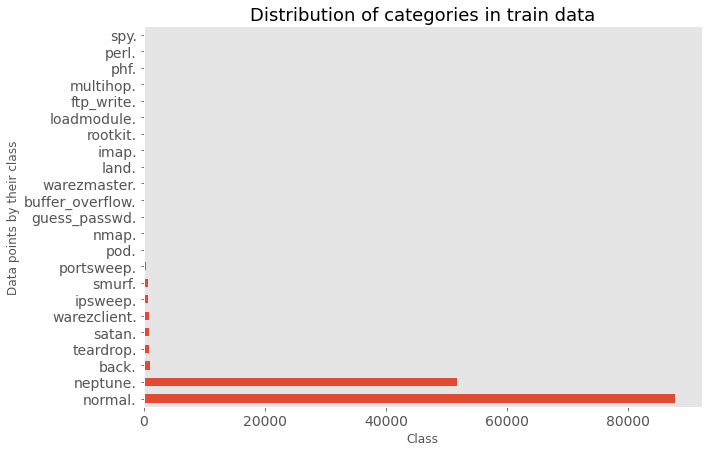

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

In [15]:
# Organizing data
print("Sorting and grouping attack types by label:")
print("=======================================================================")
print(dataset.groupby('label')['label'].count())
print("=======================================================================")
# Displaying and plotting the different categories in class label
plt.figure(figsize=(10,7))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
class_distribution = dataset['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Class')
plt.ylabel('Data points by their class')
plt.title('Distribution of categories in train data')
plt.grid()
plt.show()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
sorted_yi = np.argsort(-class_distribution.values) # this provides the classes in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/dataset.shape[0]*100), 3), '%)')


In [16]:
dataset.groupby(['protocol_type'])['label'].value_counts()

protocol_type  label           
icmp           normal.               892
               smurf.                641
               ipsweep.              560
               pod.                  206
               nmap.                 103
               satan.                  3
               portsweep.              1
tcp            normal.             75789
               neptune.            51820
               back.                 968
               warezclient.          893
               satan.                733
               portsweep.            415
               ipsweep.               91
               guess_passwd.          53
               buffer_overflow.       30
               nmap.                  30
               warezmaster.           20
               land.                  19
               imap.                  12
               loadmodule.             9
               ftp_write.              8
               multihop.               7
               rootkit.  